# Import the library

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, gzip, random
from neural_network import Model
from neural_network.layers import Input, Linear, ReLU, Softmax
from neural_network.optimizers import SGD
from neural_network.losses import NegativeLogLikelihood

# Import the dataset

In [12]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
	data = pickle._Unpickler(f)
	data.encoding = 'latin1'
	train, valid, test = data.load()

x_train = np.array(train[0])
y_train = np.array(train[1])
x_valid = np.array(valid[0])
y_valid = np.array(valid[1])
x_test = np.array(test[0])
y_test = np.array(test[1])

# Create the model

In [13]:
model = Model()
model.add(Input(28 * 28))
model.add(Linear(128))
model.add(ReLU())
model.add(Linear(10))
model.add(ReLU())
model.add(Softmax())
model.compile(NegativeLogLikelihood(), SGD())

# Train the model

In [15]:
model.train(x_train, y_train, epochs = 10, batch_size = 10, x_val = x_valid, y_val = y_valid, print_frequency = 1000)

Epoch 1 | batch 5000 | train loss: 0.14 | train accuracy: 100.0% | val loss: 0.27 | val accuracy: 92.6%   
Epoch 2 | batch 5000 | train loss: 0.07 | train accuracy: 100.0% | val loss: 0.21 | val accuracy: 94.1%   
Epoch 3 | batch 5000 | train loss: 0.05 | train accuracy: 100.0% | val loss: 0.18 | val accuracy: 95.3%   
Epoch 4 | batch 5000 | train loss: 0.04 | train accuracy: 100.0% | val loss: 0.16 | val accuracy: 95.8%   
Epoch 5 | batch 5000 | train loss: 0.03 | train accuracy: 100.0% | val loss: 0.14 | val accuracy: 96.2%   
Epoch 6 | batch 5000 | train loss: 0.03 | train accuracy: 100.0% | val loss: 0.13 | val accuracy: 96.6%   
Epoch 7 | batch 5000 | train loss: 0.02 | train accuracy: 100.0% | val loss: 0.12 | val accuracy: 96.8%   
Epoch 8 | batch 5000 | train loss: 0.02 | train accuracy: 100.0% | val loss: 0.11 | val accuracy: 96.9%   
Epoch 9 | batch 5000 | train loss: 0.01 | train accuracy: 100.0% | val loss: 0.11 | val accuracy: 97.1%   
Epoch 10 | batch 5000 | train loss: 0

# Test the model

In [16]:
model.test(x_test, y_test)

Test loss: 0.10 | test accuracy: 97.0%


(0.9697, array([0.10198972]))

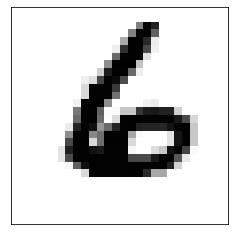

Model prediction: 6


In [17]:
digit = x_test[random.randint(0, x_test.shape[0])]
fig = plt.imshow(digit.reshape(28, 28), cmap='Greys')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()
print("Model prediction:", model.predict(digit))